In [1]:
%cd /kaggle/working

/kaggle/working


In [64]:
import numpy as np
import polars as pl

In [65]:
test_info_df = pl.read_parquet("output/preprocess/make_hack_map/base/test_info.parquet")
test_old_info_df = pl.read_parquet(
    "output/preprocess/make_hack_map/base/test_old_info.parquet"
)

In [66]:
test_info_df.head()

sample_id,location,month,day,seconds,tick
str,u32,i64,i64,i64,i64
"""test_0""",230,3,8,28800,24
"""test_10""",55,3,14,0,0
"""test_100""",1,7,27,0,0
"""test_1000""",25,7,24,57600,48
"""test_10000""",216,3,18,57600,48


In [67]:
test_pred_df = pl.read_parquet(
    "output/experiments/810_pred_elaps_time/base/test_predict.parquet"
)
oof_df = pl.read_parquet("output/experiments/810_pred_elaps_time/base/oof.parquet")

In [68]:
test_info_df = test_info_df.with_columns(
    [
        (
            pl.datetime(2000, pl.col("month"), pl.col("day"), 0, 0, 0)
            + pl.duration(seconds=pl.col("seconds"))
        ).alias("no_year_timestamp"),
        test_pred_df["pred"],
    ]
)
test_info_df.head()

sample_id,location,month,day,seconds,tick,no_year_timestamp,pred
str,u32,i64,i64,i64,i64,datetime[μs],f32
"""test_0""",230,3,8,28800,24,2000-03-08 08:00:00,0.027219
"""test_10""",55,3,14,0,0,2000-03-14 00:00:00,0.559951
"""test_100""",1,7,27,0,0,2000-07-27 00:00:00,0.758606
"""test_1000""",25,7,24,57600,48,2000-07-24 16:00:00,0.217828
"""test_10000""",216,3,18,57600,48,2000-03-18 16:00:00,0.023667


In [70]:
test_old_info_df = (
    test_old_info_df.with_row_index()
    .with_columns((pl.col("index") / len(test_old_info_df)).alias("elaps"))
    .with_columns(
        (
            pl.datetime(2000, pl.col("month"), pl.col("day"), 0, 0, 0)
            + pl.duration(seconds=pl.col("seconds"))
        ).alias("no_year_timestamp")
    )
)
test_old_info_df.head()

index,sample_id,location,month,day,seconds,tick,elaps,no_year_timestamp
u32,str,u32,i64,i64,i64,i64,f64,datetime[μs]
0,"""test_169651""",0,3,1,0,0,0.0,2000-03-01 00:00:00
1,"""test_524862""",1,3,1,0,0,0.0000016,2000-03-01 00:00:00
2,"""test_634129""",2,3,1,0,0,0.0000032,2000-03-01 00:00:00
3,"""test_403572""",3,3,1,0,0,0.0000048,2000-03-01 00:00:00
4,"""test_484578""",4,3,1,0,0,0.0000064,2000-03-01 00:00:00


## 誤差の確認
### oof の誤差を確認
oof について予測値との差分は最大でも 0.13666 で、678.168402778* 0.13666 = 92日分

重複する2つが１年離れていれば大小関係を比較するだけでどっちが１年目でどっちが２年目か判断可能

In [35]:
diff_sereise = (test_old_info_df["elaps"] - test_old_info_df["pred"]).abs()

diff_sereise.describe()

statistic,value
str,f64
"""count""",625000.0
"""null_count""",0.0
"""mean""",0.005449
"""std""",0.004499
"""min""",4.8438e-8
"""25%""",0.002079
"""50%""",0.004427
"""75%""",0.007695
"""max""",0.136681


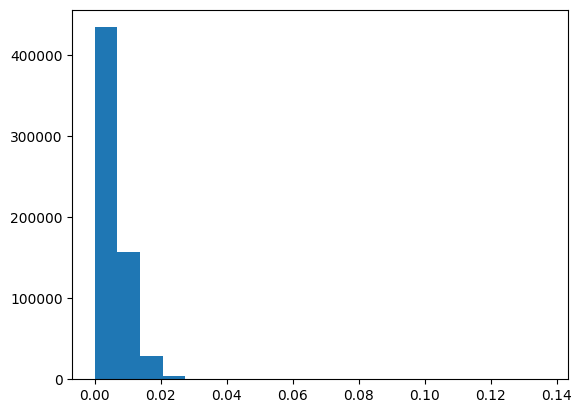

In [36]:
import matplotlib.pyplot as plt

plt.hist(diff_sereise, bins=20)
plt.show()

### test_new の重複ないデータの分布を確認

重複無しのデータについては必ず９年目の後半に含まれているはず

<Axes: >

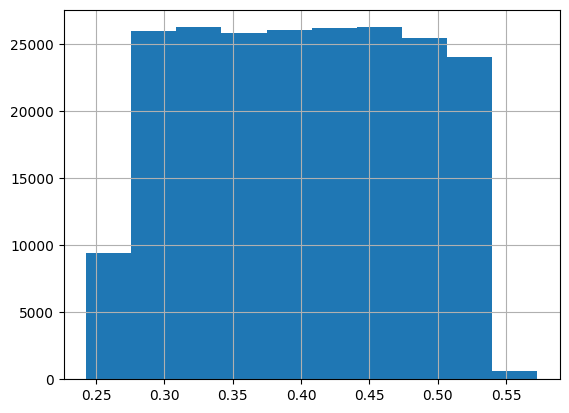

In [45]:
no_duplicated = test_info_df.with_columns(
    (pl.count("day").over(["no_year_timestamp", "location"]) == 2).alias(
        "is_duplicated"
    )
).filter(pl.col("is_duplicated") == False)


no_duplicated["pred"].to_pandas().hist()

## 前半と後半に分ける

In [75]:
test_info_year_df = (
    (
        test_info_df.with_columns(
            [
                (pl.count("month").over(["no_year_timestamp", "location"]) == 2).alias(
                    "is_duplicated"
                ),
                (pl.mean("pred").over(["no_year_timestamp", "location"])).alias(
                    "pred_mean"
                ),
            ]
        )
        .with_columns(
            pl.when(pl.col("is_duplicated") == False)
            .then(pl.lit(1))
            .when(pl.col("pred") > pl.col("pred_mean"))
            .then(pl.lit(1))
            .otherwise(pl.lit(0))
            .alias("is_first_year")
        )
        .drop(["pred_mean", "no_year_timestamp"])
    )
    .with_row_index("original_index")
    .sort(["is_first_year", "month", "day", "seconds", "location"])
    .with_row_index("sort_index")
).sort("original_index")
test_info_year_df.head()

sort_index,original_index,sample_id,location,month,day,seconds,tick,pred,is_duplicated,is_first_year
u32,u32,str,u32,i64,i64,i64,i64,f32,bool,i32
8678,0,"""test_0""",230,3,8,28800,24,0.027219,true,0
287519,1,"""test_10""",55,3,14,0,0,0.559951,true,1
442985,2,"""test_100""",1,7,27,0,0,0.758606,true,1
167833,3,"""test_1000""",25,7,24,57600,48,0.217828,true,0
20568,4,"""test_10000""",216,3,18,57600,48,0.023667,true,0


In [76]:
test_info_year_df.write_parquet("output/test_info_year.parquet")

In [78]:
test_info_year_df.sort("sort_index")

sort_index,original_index,sample_id,location,month,day,seconds,tick,pred,is_duplicated,is_first_year
u32,u32,str,u32,i64,i64,i64,i64,f32,bool,i32
0,138117,"""test_267252""",0,3,1,0,0,0.011544,true,0
1,101693,"""test_223108""",1,3,1,0,0,0.012308,true,0
2,562692,"""test_781565""",2,3,1,0,0,0.009292,true,0
3,504741,"""test_711401""",3,3,1,0,0,0.009514,true,0
4,228828,"""test_377300""",4,3,1,0,0,0.013316,true,0
…,…,…,…,…,…,…,…,…,…,…
624995,448011,"""test_642749""",379,12,31,57600,48,0.451198,false,1
624996,524428,"""test_735293""",380,12,31,57600,48,0.449318,false,1
624997,624017,"""test_98809""",381,12,31,57600,48,0.45092,false,1


In [11]:
%cd /kaggle/working

import os

from hydra import compose, initialize
from omegaconf import OmegaConf

with initialize(version_base=None, config_path="../preprocess/make_val_test_sim6"):
    cfg = compose(
        config_name="config.yaml", overrides=["debug=True"], return_hydra_config=True
    )
    print(OmegaConf.to_yaml(cfg.exp))

/kaggle/working
seed: 7
topk: 3
chunk_size: 100
output_dir: input/sim6_data
scale_dir: output/preprocess/normalize_009_rate_feat/bolton
test_data_path: input/test.parquet
test_old_data_path: input/test_old.parquet
data_dir: input/ClimSim_low-res
valid_year_id: 0



In [12]:
import json
import os
import pickle
import shutil
import sys
import time
from glob import glob
from pathlib import Path
from typing import Literal

import hydra
import numpy as np
import polars as pl
import torch
from hydra.core.hydra_config import HydraConfig
from omegaconf import DictConfig, OmegaConf
from torch.nn.functional import normalize
from torch.utils.data import DataLoader, TensorDataset
from tqdm.auto import tqdm


def compute_cosine_similarity(tensor1, tensor2):
    return torch.mm(tensor1, tensor2.t())


def get_top_k_similar_rows(matrix, target_matrix, k=5, chunk_size=1000, device="cpu"):
    matrix = matrix.to(device)
    normalized_matrix = normalize(matrix, p=2, dim=1)
    target_matrix = target_matrix.to(device)
    normalized_target_matrix = normalize(target_matrix, p=2, dim=1)

    top_k_indices = torch.empty((matrix.size(0), k), dtype=torch.long, device="cpu")

    dataset = TensorDataset(normalized_matrix)
    dataloader = DataLoader(dataset, batch_size=chunk_size)

    for ci, chunk in enumerate(tqdm(dataloader)):
        chunk_tensor = chunk[0]
        chunk_size_actual = chunk_tensor.size(0)

        cosine_similarities = compute_cosine_similarity(
            chunk_tensor, normalized_target_matrix
        ).to(device)
        top_k = torch.topk(cosine_similarities, k, dim=1)
        top_k_indices[ci * chunk_size : ci * chunk_size + chunk_size_actual] = (
            top_k.indices.cpu()
        )

    return top_k_indices

In [13]:
test_df = pl.read_csv("input/leap-atmospheric-physics-ai-climsim/test.csv")
test_old_df = pl.read_csv("input/leap-atmospheric-physics-ai-climsim/test_old.csv")

In [130]:
base_array = test_df[:, 1:].to_numpy()
old_array = test_old_df[:, 1:].to_numpy()

# scaling
feat_mean_dict = pickle.load(
    open(
        Path(cfg.exp.scale_dir) / "x_mean_feat_dict.pkl",
        "rb",
    )
)
feat_std_dict = pickle.load(
    open(
        Path(cfg.exp.scale_dir) / "x_std_feat_dict.pkl",
        "rb",
    )
)

data = torch.tensor(base_array[:, :556])
data = (data - feat_mean_dict["base"]) / (feat_std_dict["base"] + 1e-60)
data = data.float()
data_old = torch.tensor(old_array[:, :556])
data_old = (data_old - feat_mean_dict["base"]) / (feat_std_dict["base"] + 1e-60)
data_old = data_old.float()

top_k_similar = get_top_k_similar_rows(
    data,
    data_old,
    k=cfg.exp.topk,
    chunk_size=cfg.exp.chunk_size,
    device="cuda",
)

In [139]:
test_info_top1_df = test_info_df.with_columns(
    pl.Series(name="top1_index", values=top_k_similar[:, 0].numpy())
)

In [140]:
test_info_top1_df = test_info_top1_df.join(
    test_old_info_df.with_row_index("top1_index").with_columns(
        pl.col("top1_index").cast(pl.Int64)
    ),
    on="top1_index",
    suffix="_old",
).sort(["month", "day", "tick", "location"])

In [141]:
group_list = ["month", "day", "tick", "location"]

test_info_top1_df = test_info_top1_df.with_columns(
    pl.max("timestamp").over(group_list).alias("max_timestamp"),
    pl.min("timestamp").over(group_list).alias("min_timestamp"),
    pl.count("timestamp").over(group_list).alias("count"),
).with_columns((pl.col("max_timestamp") - pl.col("min_timestamp")).alias("time_diff"))

In [176]:
test_info_top1_df = test_info_top1_df.with_columns(
    pl.col("time_diff").dt.total_days().alias("time_diff_days")
).with_columns(
    ((360 < pl.col("time_diff_days")) & (pl.col("time_diff_days") < 370)).alias("is_ok")
)

In [179]:
test_info_top1_df.filter(pl.col("count") >= 2)["is_ok"].sum()

391942

In [178]:
test_info_top1_df.filter(pl.col("count") >= 2)

(409040, 22)